<a href="https://colab.research.google.com/github/yaman9675/understand--Airbnb/blob/main/understand_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycountry


In [ ]:
!pip install klib

In [ ]:
#import klib         #librarie to make a visualization of all the column 
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math        #used to perform math on scalar data
from numpy import loadtxt     #fast reader for simple text files
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.image as mpimg      # for reading image as an array
#import pycountry as pc
import matplotlib.ticker as mtick
import plotly.express as px
from scipy.stats import pearsonr
import folium
import warnings
warnings.filterwarnings('ignore')   #we importing this lib because we are filtering tha data lot so don't feel struck just go on 

In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Capston Project Help/Airbnb NYC 2019.csv'
airbnb = pd.read_csv(file_path)

In [ ]:
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
airbnb["neighbourhood_group"].nunique()

5

In [ ]:
airbnb["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
airbnb["neighbourhood"].nunique()

221

In [ ]:
airbnb["neighbourhood"].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
airbnb["room_type"].nunique()

3

In [ ]:
airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
airbnb["minimum_nights"].nunique()

109

In [ ]:
airbnb["minimum_nights"].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

In [ ]:
print(airbnb['price'].min())
print(airbnb['price'].max())

0
10000


In [ ]:
print(airbnb['latitude'].min())
print(airbnb['latitude'].max())
print(airbnb['longitude'].min())
print(airbnb['longitude'].max())

40.49979
40.91306
-74.24442
-73.71299


In [ ]:
#neighbourhood_group
count = airbnb["neighbourhood_group"].value_counts().reset_index()
count['percent'] = count['neighbourhood_group']*100/(len(airbnb['neighbourhood_group']))
ad = count.rename(columns = {'index':'neighbourhood_group', 'neighbourhood_group':'count'})

In [ ]:
ad

,neighbourhood_group,count,percent
0,Manhattan,21661,44.301053
1,Brooklyn,20104,41.116679
2,Queens,5666,11.588097
3,Bronx,1091,2.231312
4,Staten Island,373,0.762859


<BarContainer object of 5 artists>

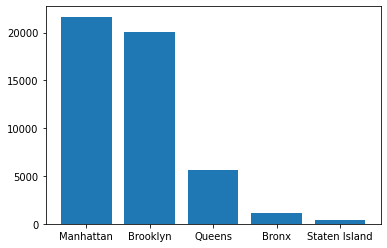

In [ ]:
x = ad['neighbourhood_group']
y = ad['count']
plt.bar(x,y)

In [ ]:
#polar graph to be draw

In [ ]:
#neighbourhood
feq = airbnb["neighbourhood"].value_counts().reset_index()
feq['percent'] = feq['neighbourhood']*100/(len(airbnb['neighbourhood']))
ar = feq.rename(columns = {'index':'neighbourhood', 'neighbourhood':'count'})

In [ ]:
ar

,neighbourhood,count,percent
0,Williamsburg,3920,8.017180
1,Bedford-Stuyvesant,3714,7.595869
2,Harlem,2658,5.436139
3,Bushwick,2465,5.041415
4,Upper West Side,1971,4.031087
...,...,...,...
216,Fort Wadsworth,1,0.002045
217,Richmondtown,1,0.002045
218,New Dorp,1,0.002045
219,Rossville,1,0.002045


In [ ]:
feq = airbnb["neighbourhood"].value_counts().reset_index()
feq['percent'] = feq['neighbourhood']*100/(len(airbnb['neighbourhood']))
ar = feq.rename(columns = {'index':'neighbourhood', 'neighbourhood':'count'})

In [ ]:
#rooms
room_fq = airbnb['room_type'].value_counts().reset_index()
room_fq['percent'] = room_fq['room_type']*100/(len(airbnb['room_type']))
room = room_fq.rename(columns = {'index':'room_type', 'room_type':'count'})

In [ ]:
room

,room_type,count,percent
0,Entire home/apt,25409,51.966459
1,Private room,22326,45.661111
2,Shared room,1160,2.372431


<BarContainer object of 3 artists>

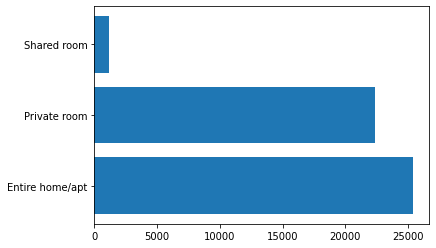

In [ ]:
x = room['room_type']
y = room['count']
plt.barh(x, y,)

In [ ]:
#Bar chart on polar axis remaining

In [ ]:
#nights
frequency, bins = np.histogram(airbnb['minimum_nights'], bins=17, range=[0, 1260])
print(frequency)
print(bins)

[48577   184    68     9    45     1     6     0     0     0     0     0
     0     4     0     0     1]
[   0.           74.11764706  148.23529412  222.35294118  296.47058824
  370.58823529  444.70588235  518.82352941  592.94117647  667.05882353
  741.17647059  815.29411765  889.41176471  963.52941176 1037.64705882
 1111.76470588 1185.88235294 1260.        ]


In [ ]:
nights = pd.DataFrame(data={'range' :['0-74', '74-148', '148-222', '222-296', '296-370', '370-444', '444-518', '518-592', 
                                      '592-667', '667-741', '741-815', '815-889', '889-963', '963-1037', '1037-1111','1111-1185', '1185-1260'],
                             'frequency':[48577, 184, 68, 9, 45, 1, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1]})
        
nights['percentage'] = nights['frequency']*100/(nights['frequency'].sum())

In [ ]:
nights

,range,frequency,percentage
0,0-74,48577,99.349627
1,74-148,184,0.376317
2,148-222,68,0.139074
3,222-296,9,0.018407
4,296-370,45,0.092034
5,370-444,1,0.002045
6,444-518,6,0.012271
7,518-592,0,0.000000
8,592-667,0,0.000000
9,667-741,0,0.000000


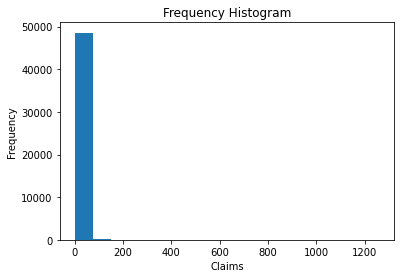

In [ ]:
plt.hist(airbnb['minimum_nights'], bins=17, range=[0, 1260])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

In [ ]:
nights_40 = airbnb[airbnb['minimum_nights'] <= 40]

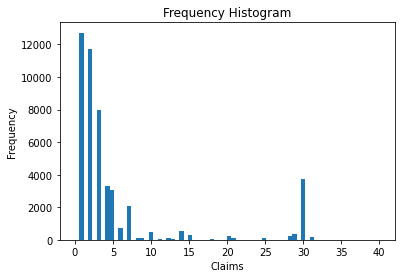

In [ ]:
plt.hist(nights_40['minimum_nights'], bins=70, range=[0, 40])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

In [ ]:
#price
frequency_pr, bins_pr = np.histogram(airbnb['price'], bins=17, range=[0, 10000])
print(frequency_pr)
print(bins_pr)

[47994   691    89    43    21    16    10     5     8     0     3     4
     2     2     1     0     6]
[    0.           588.23529412  1176.47058824  1764.70588235
  2352.94117647  2941.17647059  3529.41176471  4117.64705882
  4705.88235294  5294.11764706  5882.35294118  6470.58823529
  7058.82352941  7647.05882353  8235.29411765  8823.52941176
  9411.76470588 10000.        ]


In [ ]:
pric = pd.DataFrame(data={'range' :['0-588', '588-1176', '1176-1764', '1764-2352', '2353-2941', '2941-3529', '3529-4117', '4117-4705', '4705-5294', 
                                    '5294-5882', '5882-6470', '6470-7058', '7058-7647', '7647-8235', '8235-8823', '8823-9411', '9411-10000'],
                             'frequency':[47994, 691, 89, 43, 21, 16, 10, 5, 8, 0, 3, 4, 2, 2, 1, 0, 6]})
        
pric['percentage'] = pric['frequency']*100/(pric['frequency'].sum())

In [ ]:
pric

,range,frequency,percentage
0,0-588,47994,98.157276
1,588-1176,691,1.413232
2,1176-1764,89,0.182023
3,1764-2352,43,0.087944
4,2353-2941,21,0.042949
5,2941-3529,16,0.032723
6,3529-4117,10,0.020452
7,4117-4705,5,0.010226
8,4705-5294,8,0.016362
9,5294-5882,0,0.000000


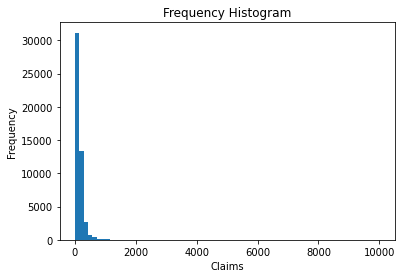

In [ ]:
plt.hist(airbnb['price'], bins=70, range=[0, 10000])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

In [ ]:
price_1000 = airbnb[airbnb['price'] <= 1000]

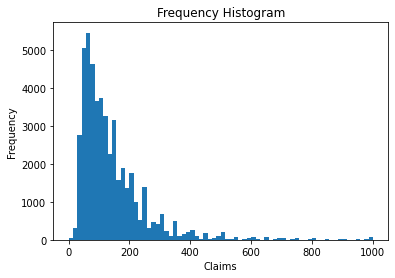

In [ ]:
plt.hist(price_1000['price'], bins=70, range=[0, 1000])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

In [ ]:
#The 10 most frequent neighbourhood
airbnb['neighbourhood'].nunique()

221

In [ ]:
neigh_10 = airbnb['neighbourhood'].value_counts().reset_index().head(10)
neigh_top_10 = neigh_10.rename(columns = {'index':'neighbourhood', 'neighbourhood':'count'})

In [ ]:
neigh_top_10

,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


<BarContainer object of 10 artists>

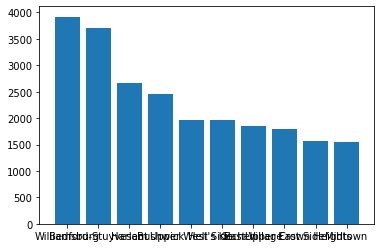

In [ ]:
x = neigh_top_10['neighbourhood']
y = neigh_top_10['count']
plt.bar(x, y)

In [ ]:
min_night_price = airbnb.groupby('minimum_nights')['price'].sum().reset_index()
min_night_price['pr_percent'] = min_night_price['price']*100/(airbnb['price'].sum())

In [ ]:
min_night_price.head(12)

,minimum_nights,price,pr_percent
0,1,1806531,24.192631
1,2,1710776,22.910303
2,3,1281850,17.166228
3,4,532416,7.129988
4,5,477281,6.391633
5,6,128154,1.716208
6,7,290575,3.891311
7,8,15533,0.208014
8,9,9719,0.130155
9,10,64666,0.865992


In [ ]:
# Percentiles
percentile_q1 = np.percentile(airbnb['minimum_nights'],99)
print(percentile_q1)

45.0


In [ ]:
# Percentiles
percentile_q1 = np.percentile(airbnb['price'],99)
print(percentile_q1)

799.0


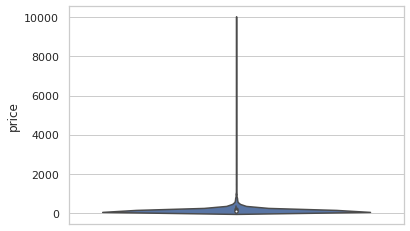

In [ ]:
#price vilon graph
ax = sns.violinplot(y=airbnb['price'])

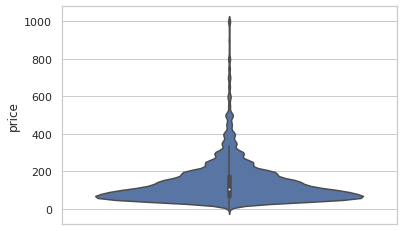

In [ ]:
ax = sns.violinplot(y=price_1000['price'])

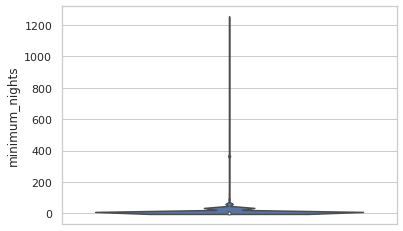

In [ ]:
#minimum_nights vilon graph
ax = sns.violinplot(y=airbnb['minimum_nights'])

In [ ]:
night_45 = airbnb[airbnb['minimum_nights'] <= 45]

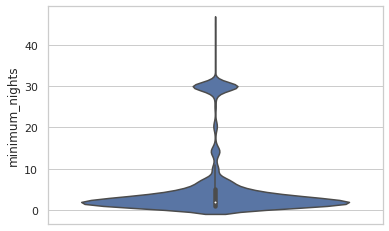

In [ ]:
ad = sns.violinplot(y = night_45['minimum_nights'])

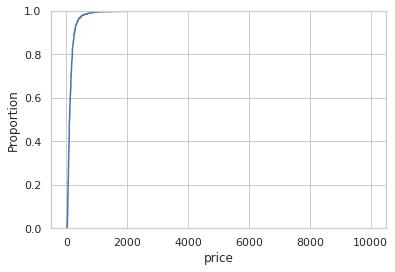

In [ ]:
sns.ecdfplot(x= airbnb['price'])

In [ ]:
#polar graph

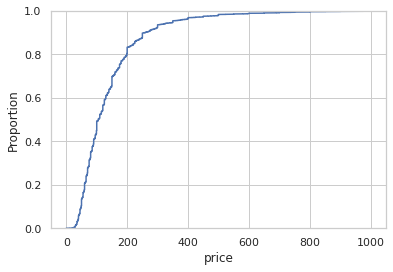

In [ ]:
sns.ecdfplot(x= price_1000['price'])

In [ ]:
#polar graph

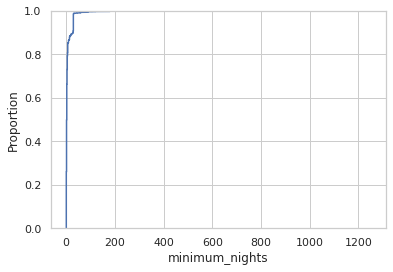

In [ ]:
sns.ecdfplot(x = airbnb['minimum_nights'])

In [ ]:
#polar graph

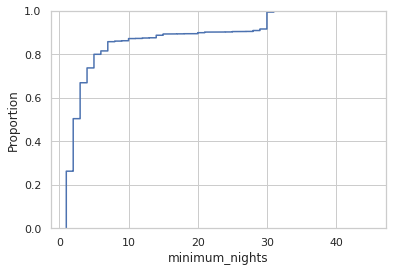

In [ ]:
sns.ecdfplot(x = night_45['minimum_nights'])

In [ ]:
#polar graph

In [ ]:
room_avg_pice = airbnb.groupby('room_type')['price'].mean().reset_index()
room_avg_pice['perc'] = room_avg_pice['price']*100/(room_avg_pice['price'].sum())

In [ ]:
room_avg_pice

,room_type,price,perc
0,Entire home/apt,211.794246,56.979459
1,Private room,89.780973,24.153967
2,Shared room,70.127586,18.866574


In [ ]:
#bar chart and polar chart

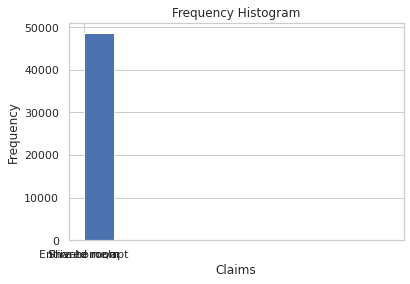

In [ ]:
plt.hist(airbnb['room_type'], color='red')
plt.hist(airbnb['price'])
plt.gca().set(title='Frequency Histogram', xlabel='Claims', ylabel='Frequency');

ConversionError: ignored

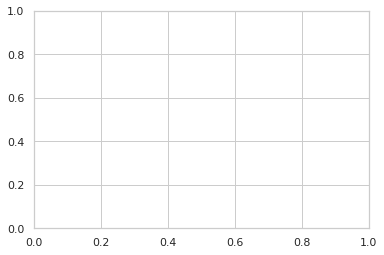

In [ ]:
visual3 = plt.hist(airbnb.price, airbnb.room_type)
plt.title('Rooms Type Distribution')
plt.ioff()
visual3

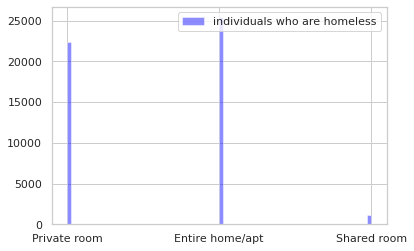

In [ ]:
#plt.hist(airbnb['price'], bins=70, alpha=0.45, color='red')
plt.hist(airbnb['room_type'], bins=70, alpha=0.45, color='blue')
plt.legend(['individuals who are homeless', 
            'family members who are homeless'])
plt.show()

In [ ]:
print(len(airbnb['neighbourhood_group']))

48895


In [ ]:
new = airbnb[['host_id', 'name']]

In [ ]:
new.tail(2)

,host_id,name
48893,30985759,43rd St. Time Square-cozy single bed
48894,68119814,Trendy duplex in the very heart of Hell's Kitchen


In [ ]:
l1 = [1,2]
l2 = [3,4]

In [ ]:
df3 = pd.DataFrame(l1, columns=['names'])

In [ ]:
li = [1,2,3,4]
li2 = [2,2,5,4]

df = pd.DataFrame(columns = ['h','i'])

df['h'] = li
df['i'] = li2

In [ ]:
df

,h,i
0,1,2
1,2,2
2,3,5
3,4,4


In [ ]:
airbnb_few = pd.DataFrame(zip(airbnb.neighbourhood_group, airbnb.neighbourhood, airbnb.latitude, airbnb.longitude, airbnb.room_type, airbnb.price, airbnb.minimum_nights))

In [ ]:
airbnb_few.head(2)

,0,1,2,3,4,5,6
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1


In [ ]:
airbnb_df = airbnb_few.rename(columns = {'0':'neighbourhood_group'}, inplace = False)
                                         #'1':'neighbourhood', '2':'latitude', '3':'longitude', '4':'room_type', '5':'price', '6':'minimum_nights'}, inplace = False)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       48895 non-null  object 
 1   1       48895 non-null  object 
 2   2       48895 non-null  float64
 3   3       48895 non-null  float64
 4   4       48895 non-null  object 
 5   5       48895 non-null  int64  
 6   6       48895 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 2.6+ MB


In [ ]:
# Viewing the first DataFrame records
airbnb_df